# Problem 1
### Badanie testów porównujących wartości średnie prób (wykład 10)
Przyjmijmy, że n-elementowe próby losowe X i Y z są z rozkładów normalnych potencjalnie różniących się
wartościami oczekiwanymi i wariancjami. Chcemy zweryfikować hipotezę o niezerowości tej różnicy.

a. Określić właściwy test zakładający rozkłady normalne. Wykorzystując symulacje komputerowe,
sprawdzić moc tego testu w zależności od różnicy Δ wartości oczekiwanych obu prób. Określić
sensowne kryterium wykrywalności i na podstawie wyników symulacji wskazać jaka jest minimalna
wykrywalna różnica Δ.

b. Powtórzyć (a) dla testu sumy rank Wilcoxona i wyciągnąć odpowiednie wnioski. W szczególności
przedyskutować założenie normalności:
i. Jaki jest widoczny zysk z wykorzystania testu zakładającego normalność prób losowych
ii. Jakie jest ryzyko (co stanie się gdy rzeczywiste rozkłady jednak nie będą normlane).
Uwaga: moc testu zależy od wielu parametrów. Należy w taki sposób rozwiązać to zadanie aby jego wyniki
można było zastosować do problemu 2.



Do weryfikacji hipotezy zostanie wykorzystany test t-studenta dla dwóch niezależnych próbek. Sensowne kryterium zostanie ustawione na 80%.

In [95]:
set.seed(123)
library(ggplot2)
compare_normal_distributions <-function(n, simulations, mean_one, mean_two, sd_one, sd_two, alpha = 0.05, t.student = TRUE){ # nolint
  rejections <- 0
  for (i in 1:simulations) {
    x <- rnorm(n, mean = mean_one, sd = sd_one)
    y <- rnorm(n, mean = mean_two, sd = sd_two)
    p_value <- NULL
    if (t.student) {
      p_value <- t.test(x, y)$p.value
    } else {
      p_value <- wilcox.test(x, y)$p.value
    }
    if (p_value < alpha) {
      rejections <- rejections + 1
    }
  }
  power <- rejections / simulations
  return(power)
}


claculate_power <- function(means_differences, sd_one, sd_two, n, simulations, t.student = TRUE) { #nolint
  power <- numeric(length(means_differences))
  for (i in seq_along(means_differences)) {
    power[i] <- compare_normal_distributions(n, simulations, 0, means_differences[i], sd_one, sd_two, t.student = t.student) # nolint
  }
  return(power)
}

create_plots <- function(t.student = TRUE) {
  sd_seq <- c(0.1, 1, 5, 10)
  means_differences <- seq(0, 5, by = 0.1)
  plot_title <- "Moc testu t-Studenta"
  color <- "blue"
  if (!t.student) {
    plot_title <- "Moc testu sumy rang Wilcoxona"
    color <- "red"
  }
  for (i in seq_along(sd_seq)) {
    for (j in i:4){
      power <- claculate_power(means_differences, sd_seq[i], sd_seq[j], 100, 1000, t.student = t.student) #nolint
      index <- which(power >= 0.8)[1]
      print(ggplot(data.frame(Delta = means_differences, Power = power), aes(x = Delta, y = Power)) + # nolint
              geom_line(color = color) +
              geom_point(color = color) +
              ylim(0, 1) +
              geom_vline(xintercept = means_differences[index], linetype = "dashed", color = "purple") + # nolint
              scale_x_continuous(breaks = sort(c(seq(means_differences[1], means_differences[length(means_differences)], by = 0.5), means_differences[index]))) + #nolint
              theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1)) + # nolint
              labs(title = plot_title, subtitle = paste("Wariancja pierwszego rozkładu:", sd_seq[i] ^ 2, "Wariancja drugiego rozkładu: ", sd_seq[j] ^ 2), x = "Różnica Δ", y = "Moc")) # nolint
    }
  }
}

### Wykresy dla testów t-studenta

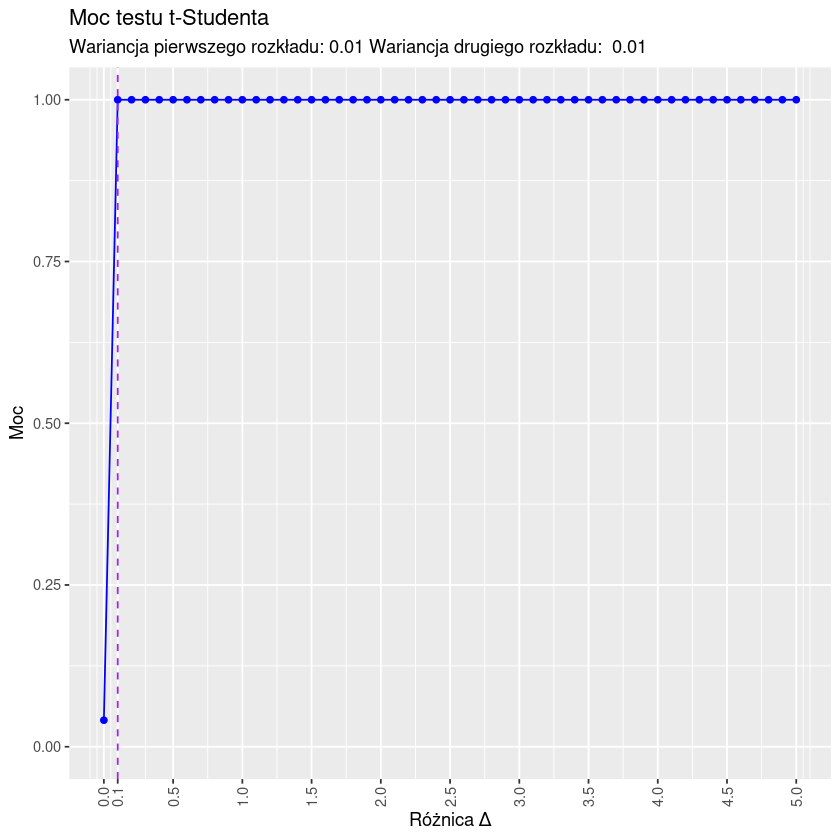

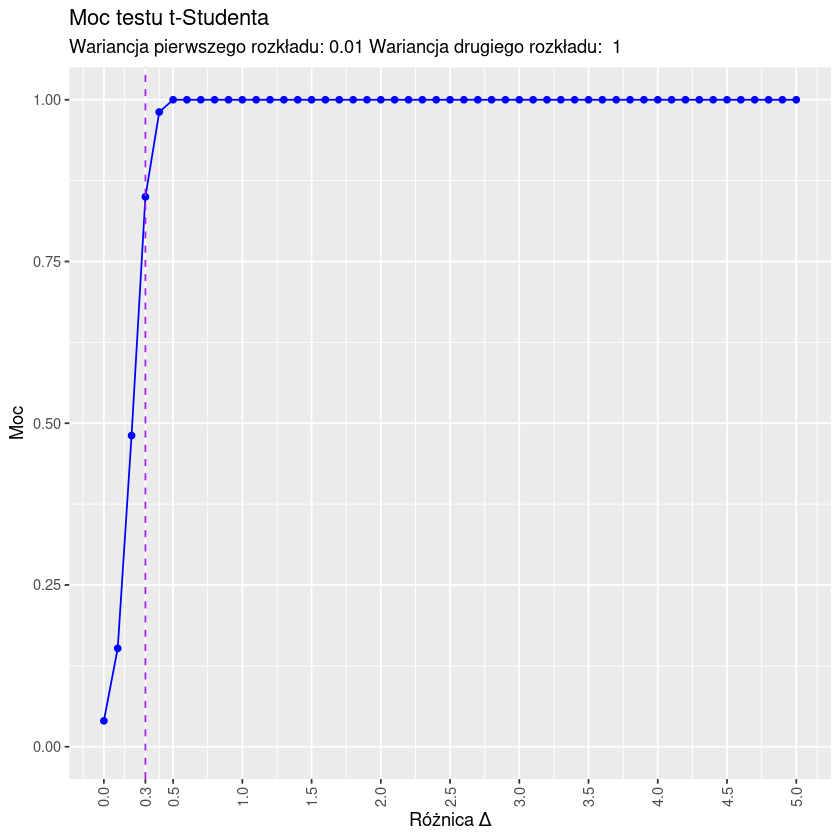

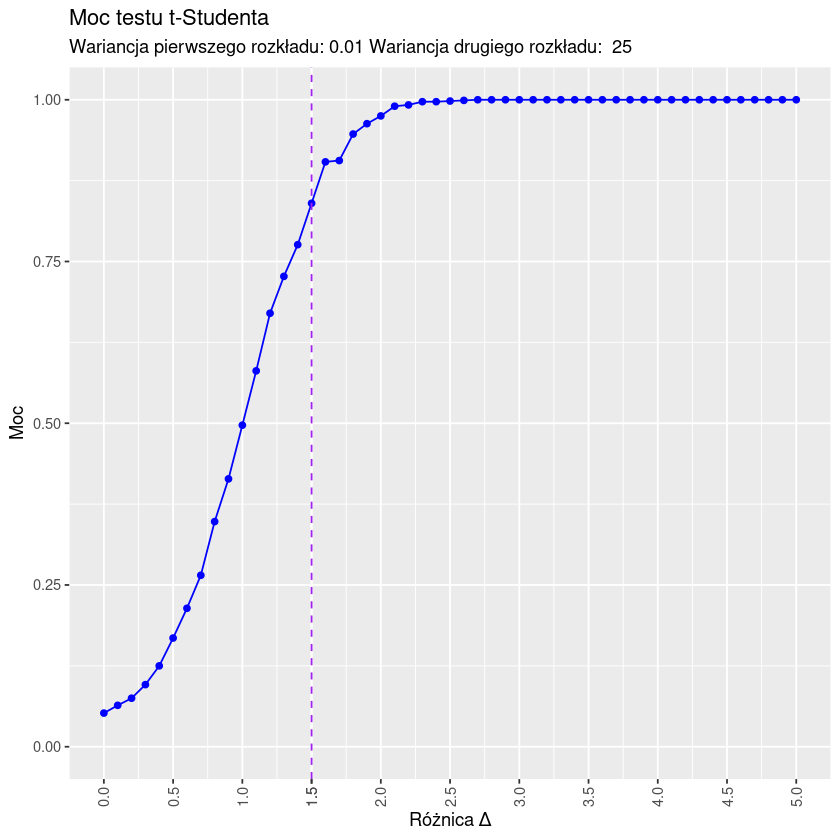

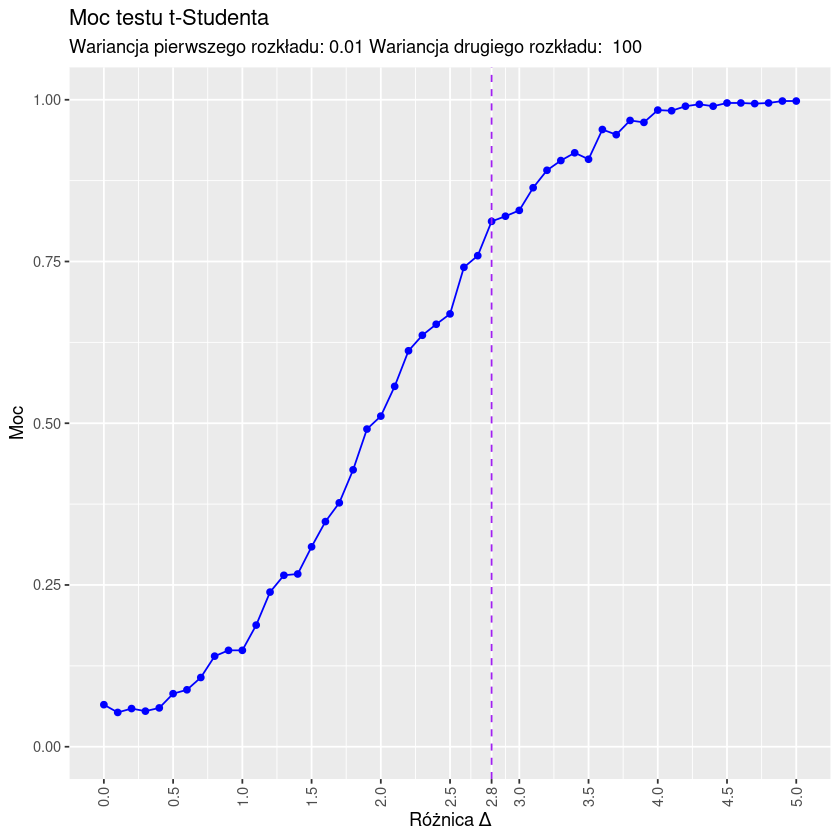

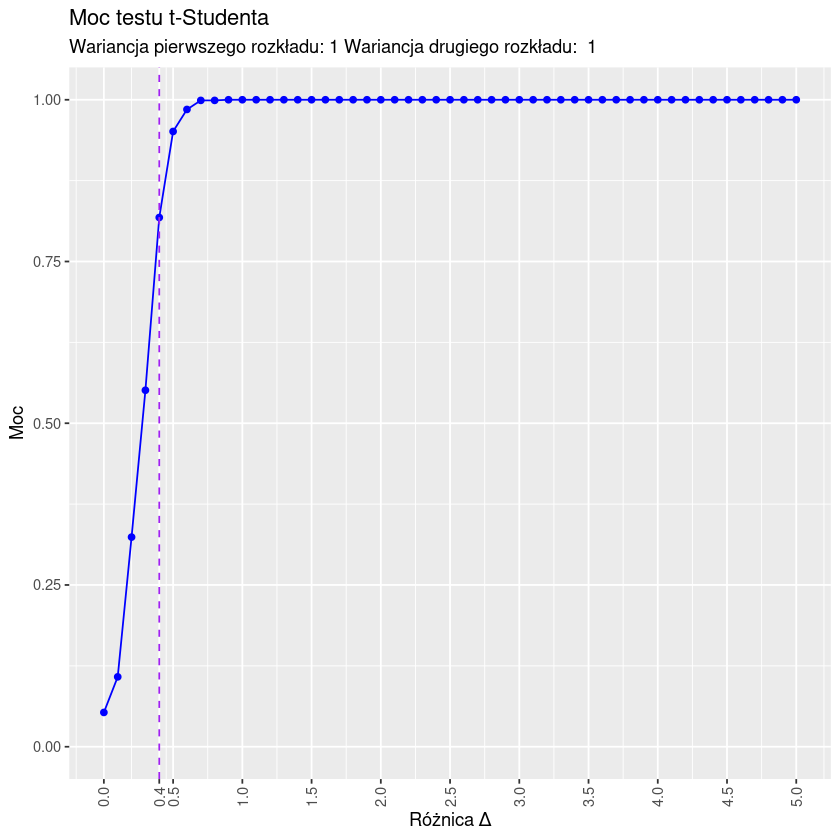

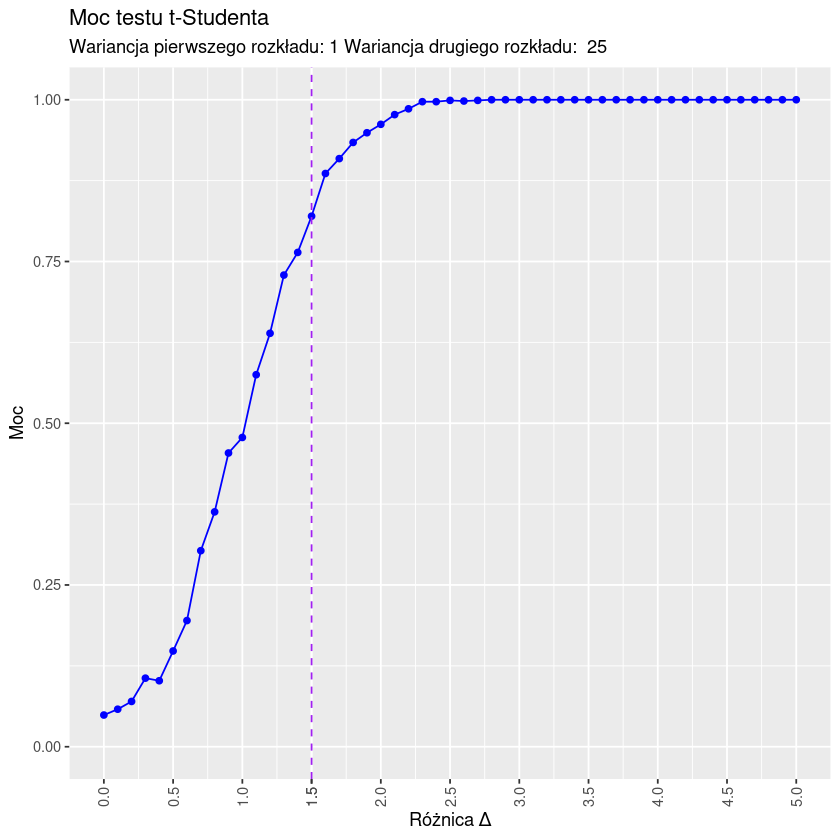

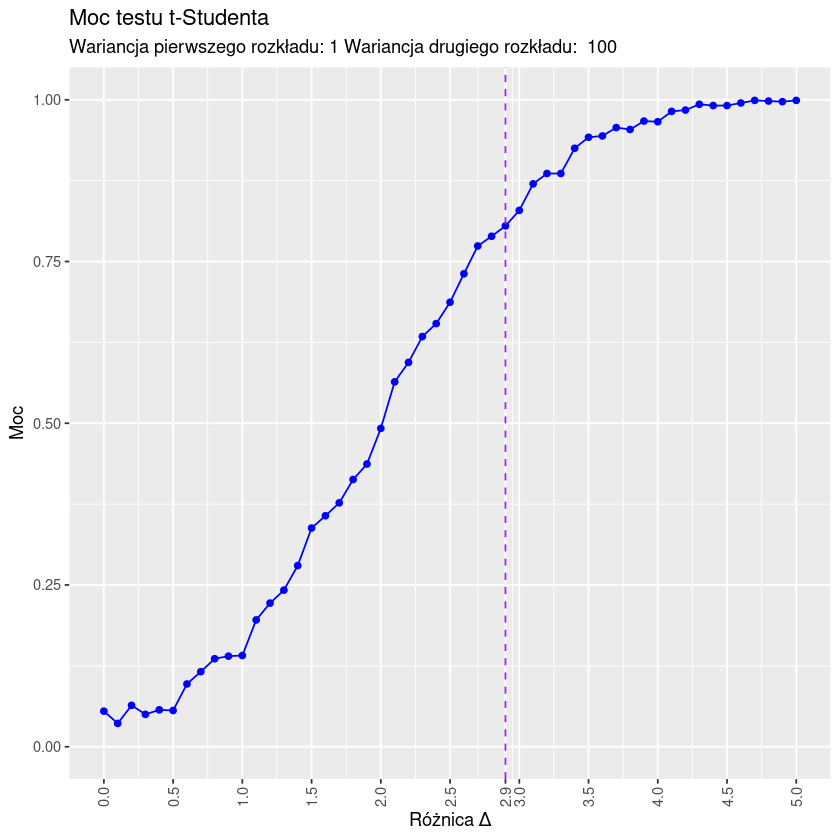

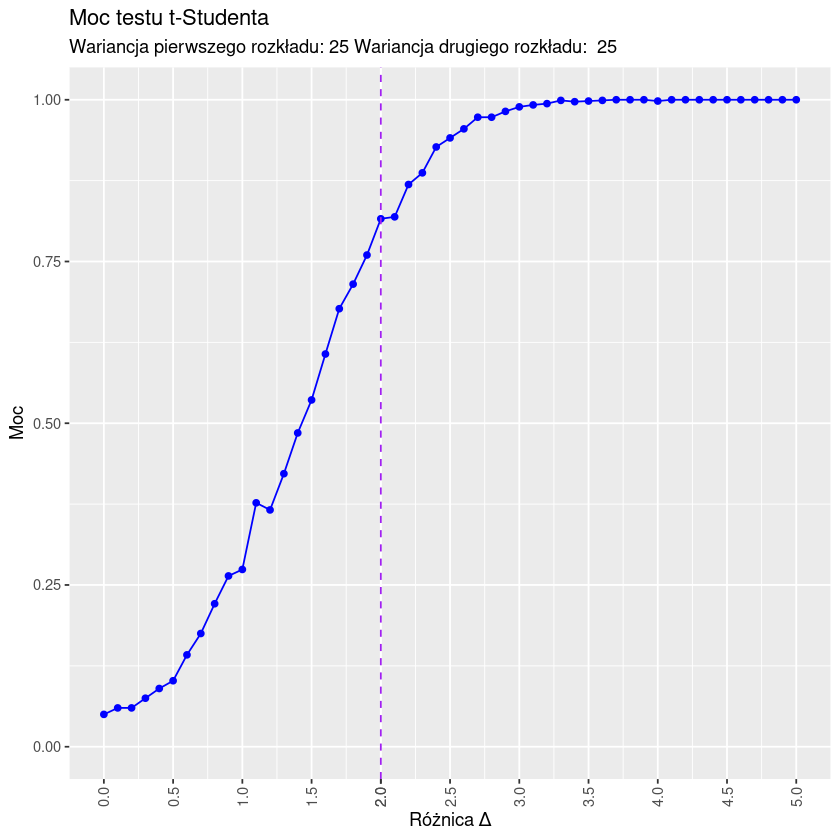

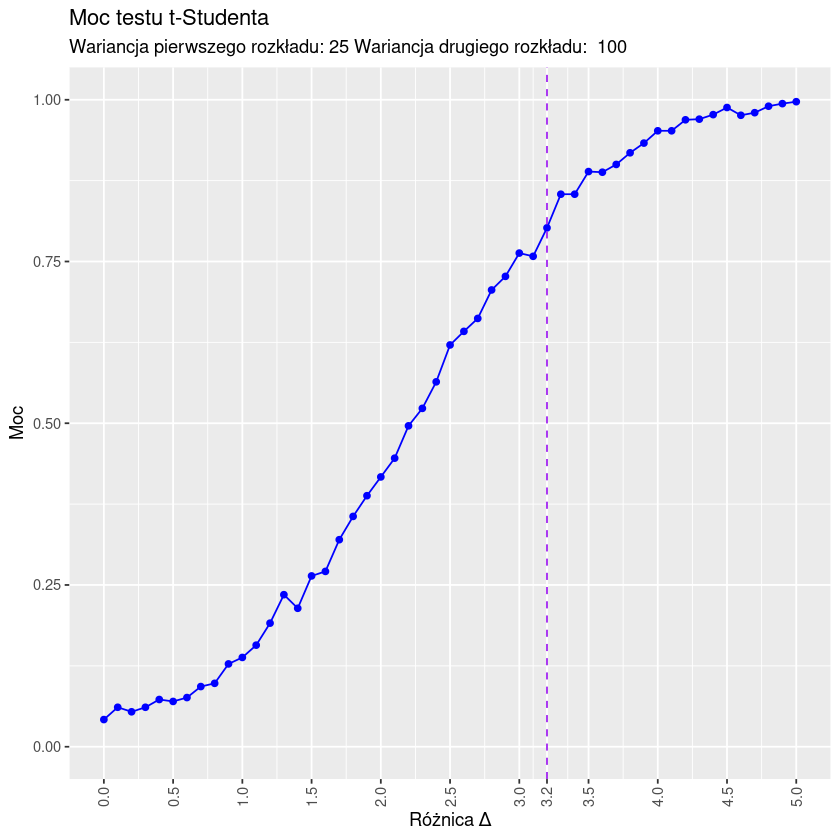

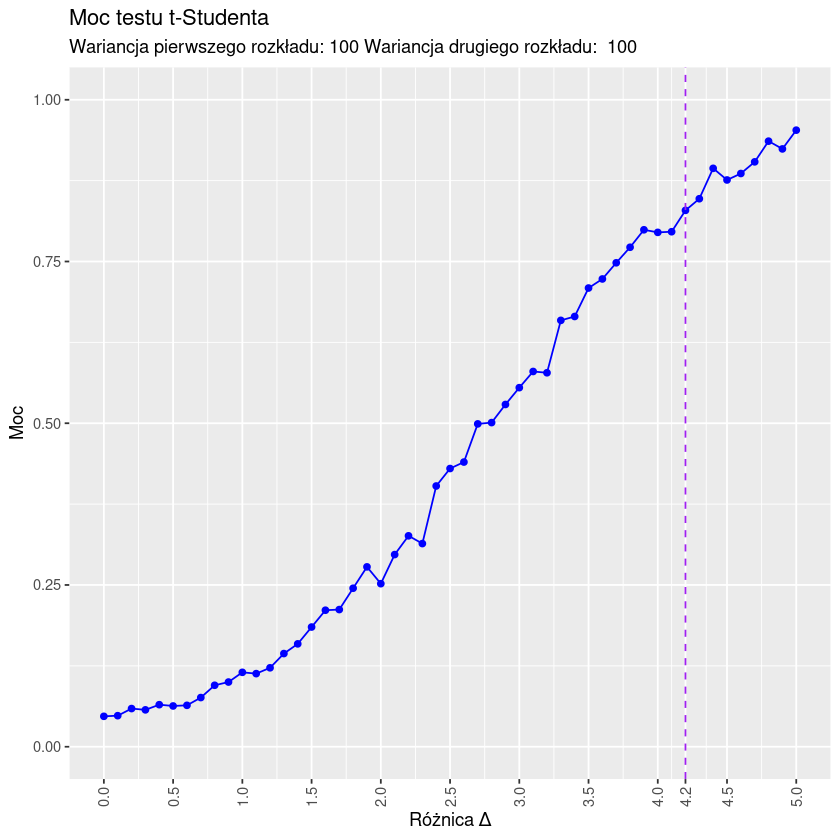

In [96]:
create_plots()

### Analiza wyników

Wraz ze wzrostem wariancji obu zbiorów, rośnie wartość minimalnej różnicy pomiędzy wartościami oczekiwanymi rozkładów, jaka jest potrzebna, aby stwierdzić, że ta różnica jest niezerowa. W przperowadzonych eksperymentach liczba próbek wynosiła 50. Dla małych wartości wariancji obu zbiorów (0.01 i 0.01) wykryta została najmniejsza mierzona różnica (0.1). Dla wartości wariancji 0.01 i 1, ta minimalna róznica wynosi 0.3, a dla wariancji 1 i 1, minimalna wykrywana różnica to 0.4. Dla większych wartości np. 1 i 100, do wykrycia różnicy potrzebna jest różnica ok. 2.9. Jeśli obie wariancje wynoszą 100, to minimalna wykryta różica wynosi 4.2.

### Wykresy dla testów sumy rang Wolcoxona

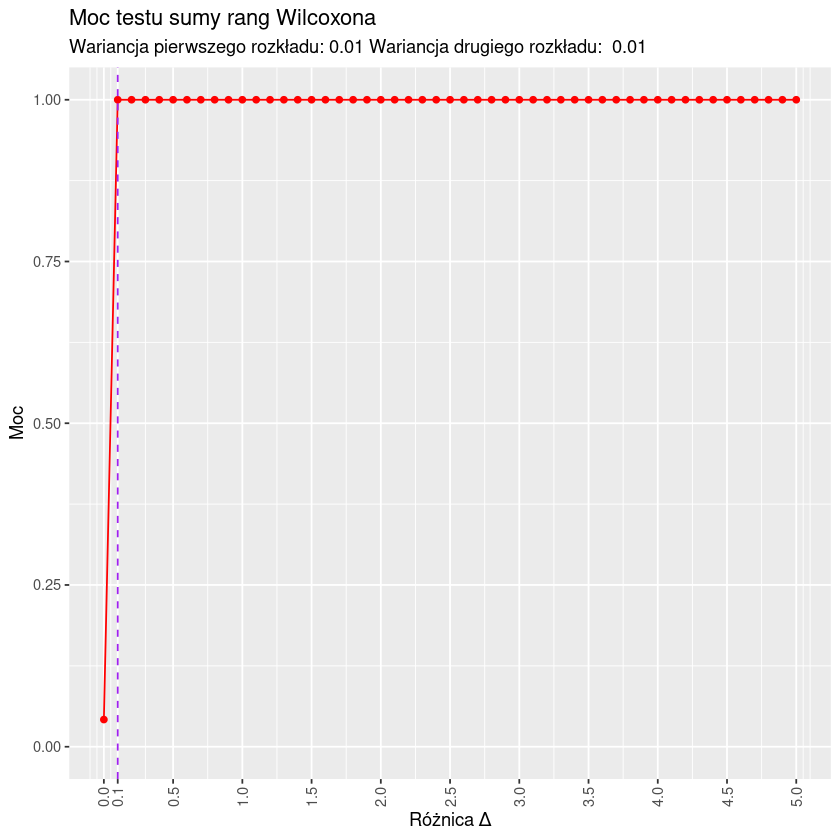

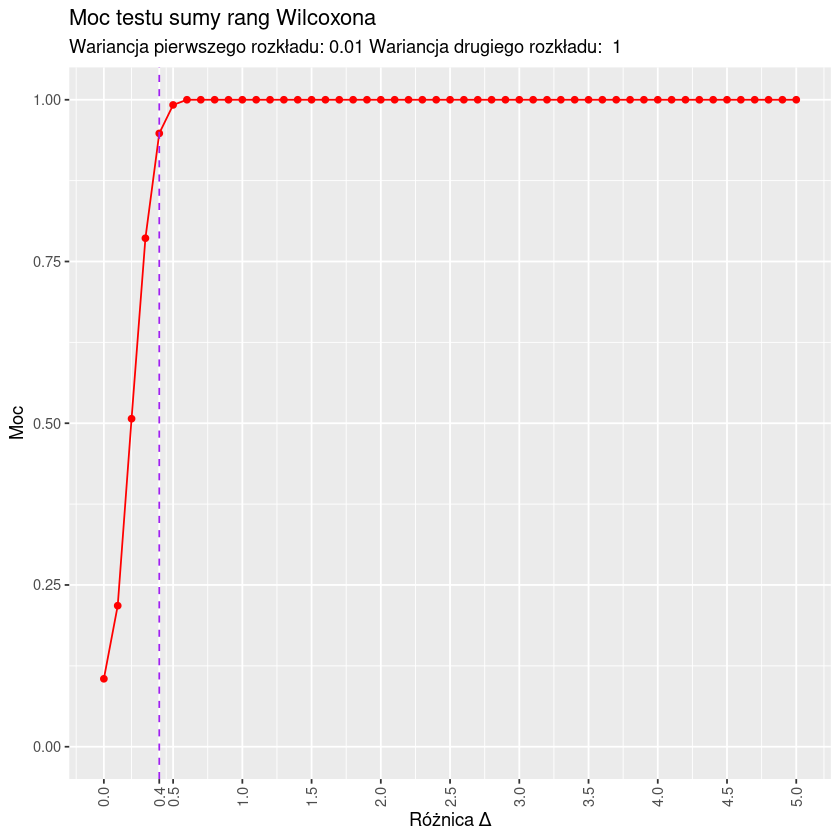

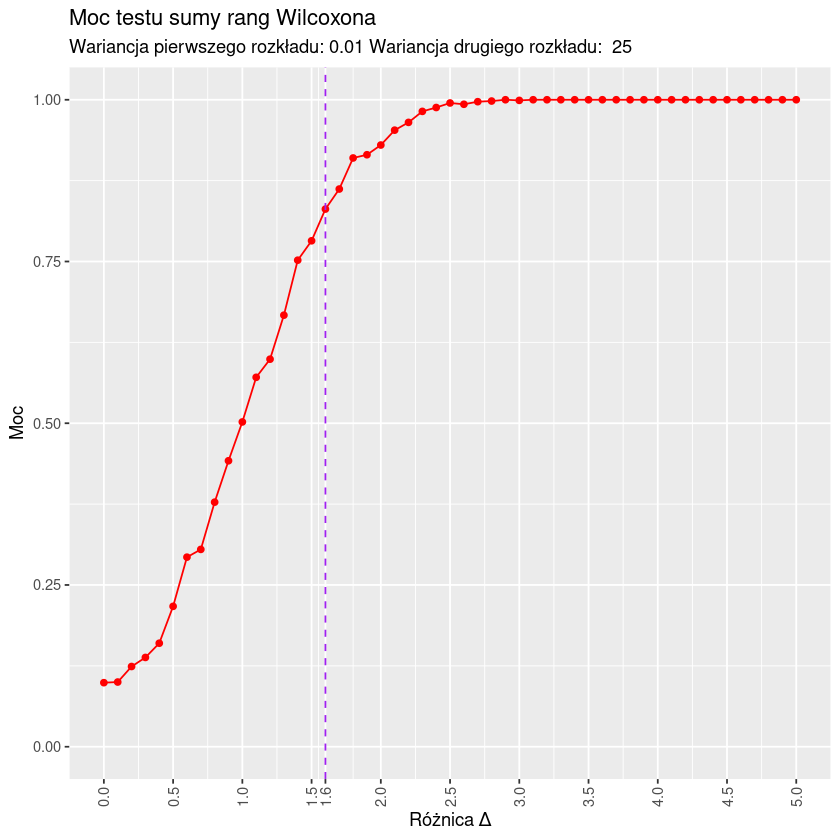

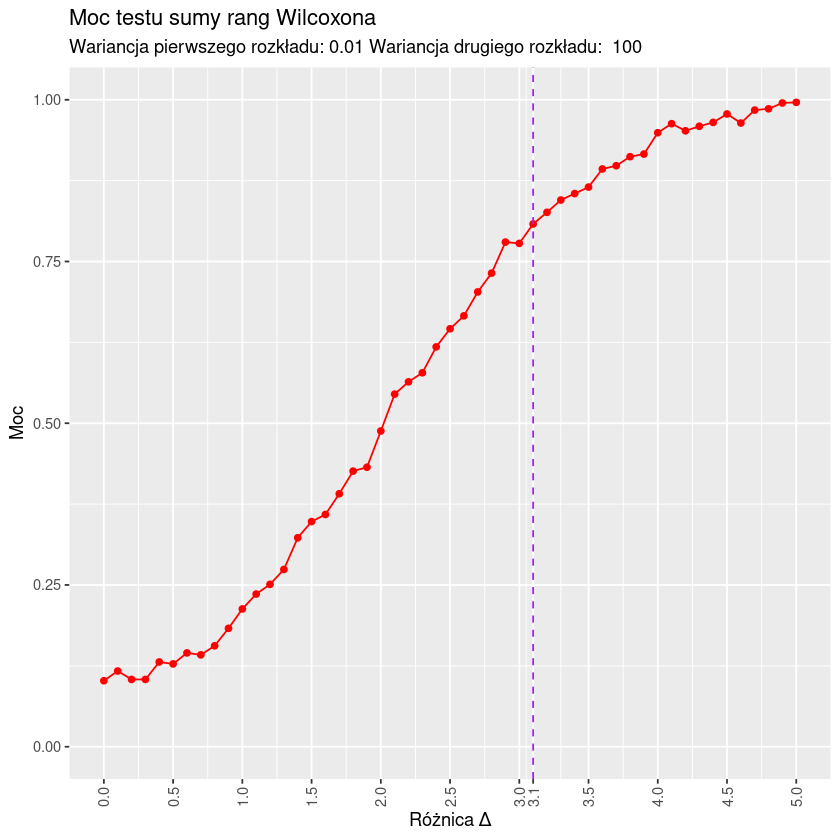

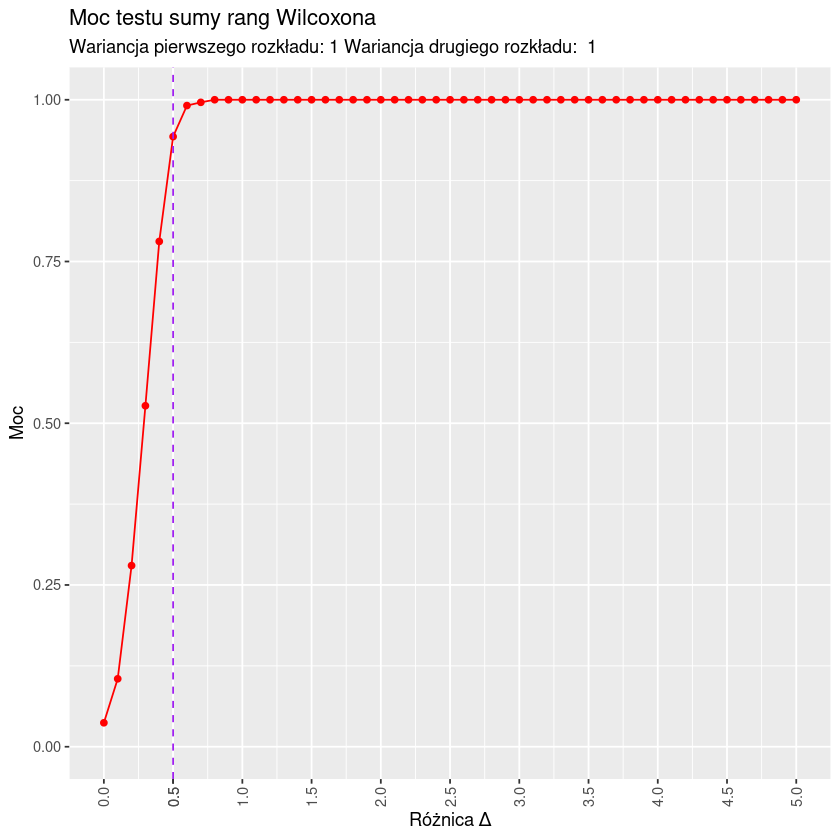

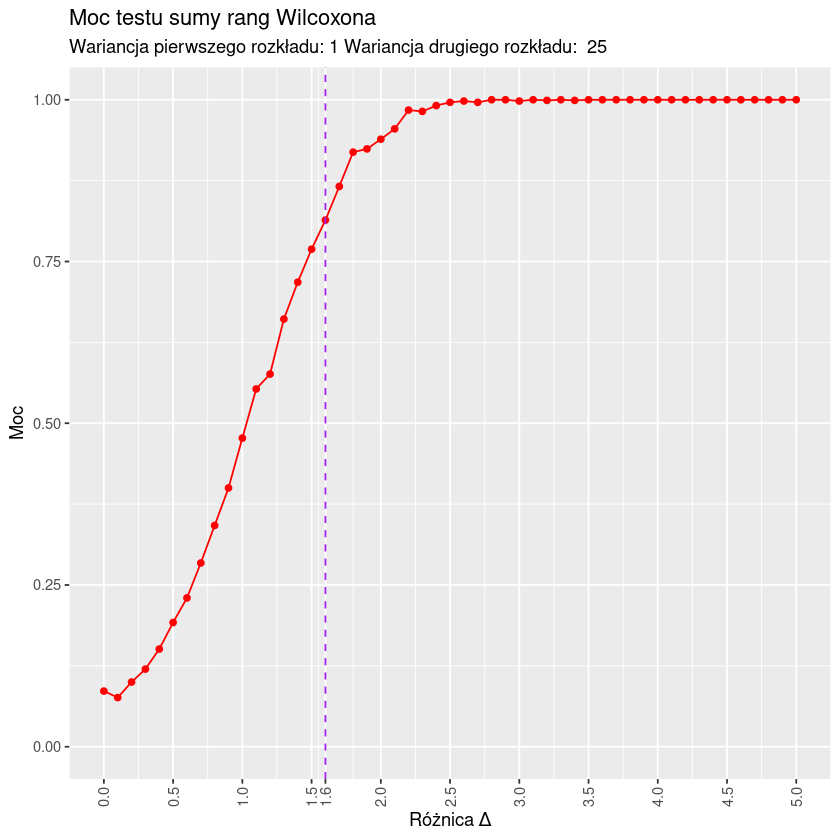

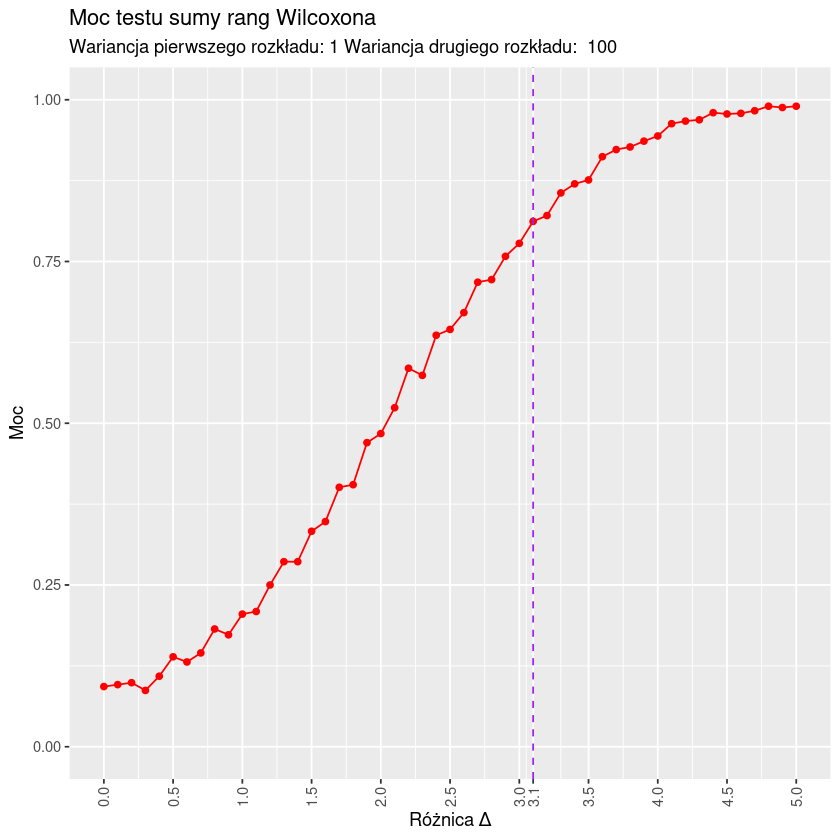

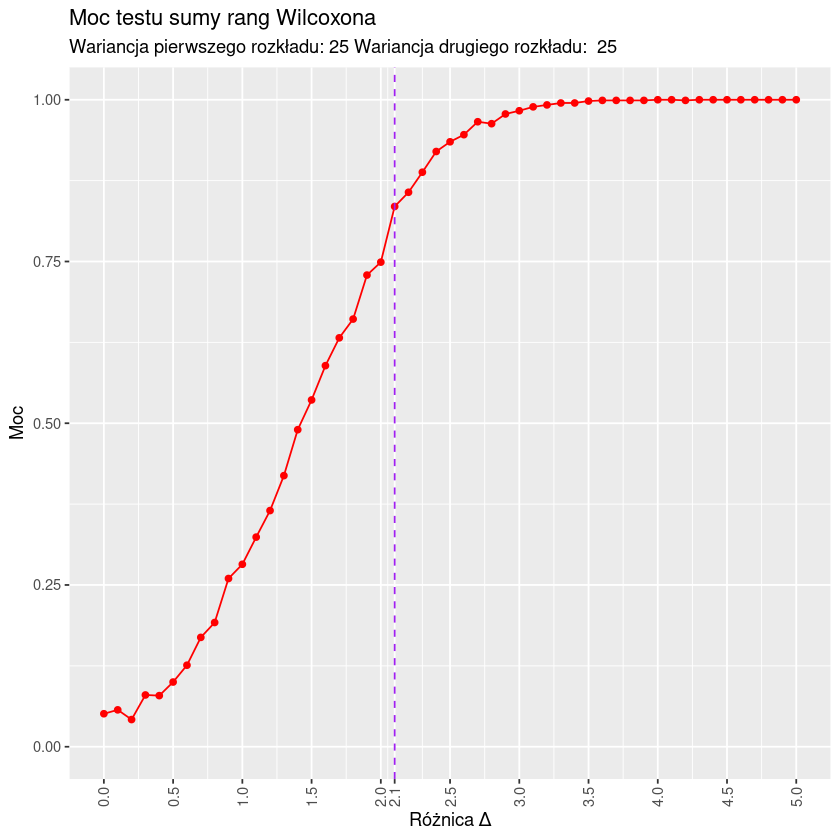

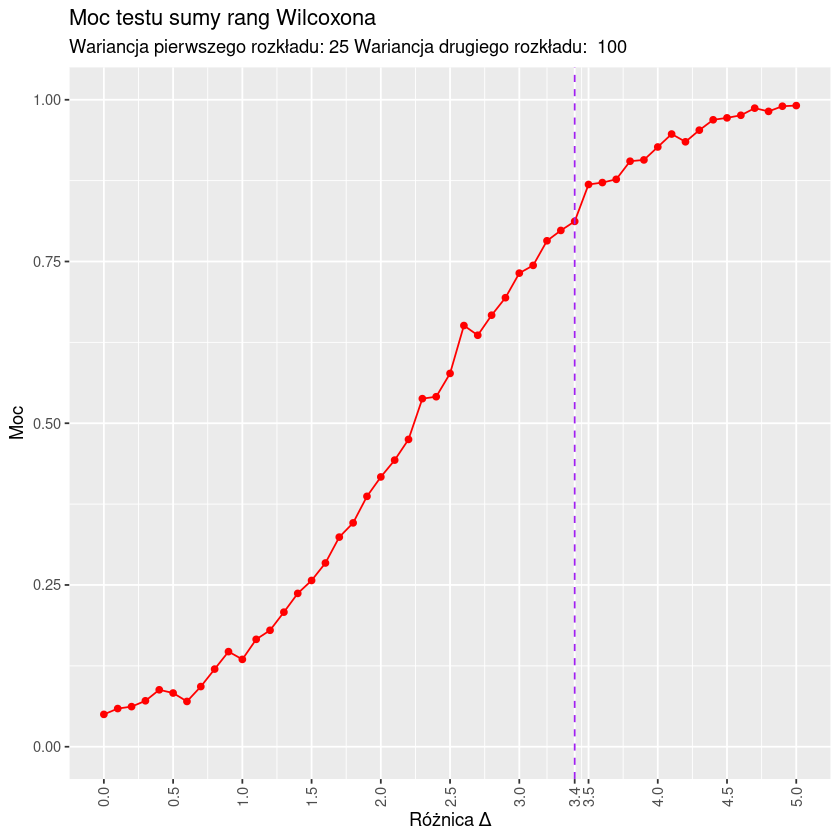

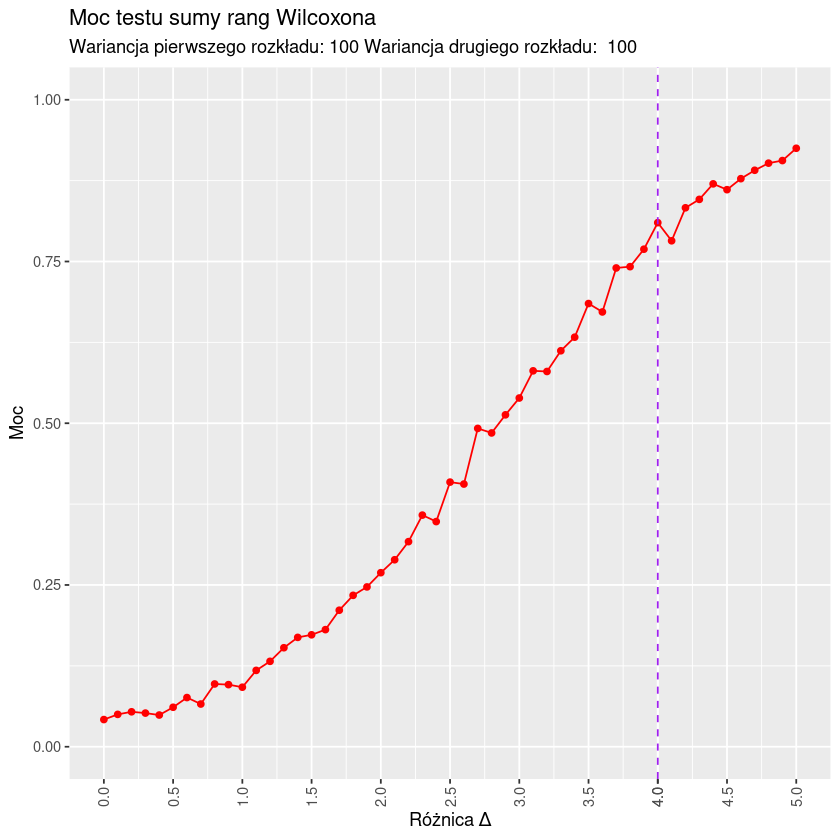

In [97]:
create_plots(t.student = FALSE)

### Wnioski

W znacznej większości przypadków (8/10) Test Wilcoxona potrzebował większej różnicy pomiędzy oczekiwanymi wartościami. Oznacza to, że w przypadku rozkładów normalnych, test t-studenta posiada większą moc statystyczną niż test sumy rang Wilcoxona. Jedynym przypadkiem, w którym test sumy rang Wilcoxona osiągnał lepszy wynik był eksperyment w którym wariancje obu zbiorów wynosiły 100, co przy próbce rozmiaru 50, może oznaczać, że dane nie przypominały w sposób idealny rozkładu normalnego, mimo że były generowane na jego podstawie. Prowadzi to to wniosku, że jeżeli mamy pewność, że dane rzeczywiście mają rozkład normalny, test t-studenta sprawdzi się lepiej. Jednak jeśli takiej pewności nie mamy, bezpieczeniejszą opcją będzie wykorzystanie testu Wilcoxona. Warto również odnotować, że esperymenty z wykorzystaniem testów t-studenta były znacznie tańsze obliczeniowo (zjęły ok. 1 minuty) od eksperymentów z testami Wilcoxona (blisko 7 minut)

# Problem 2
### Zbadanie różnic inflacji „studenckiej” i oficjalnej
W projekcie 1 analizowana była inflacja „własna studencka” w odniesieniu do oficjalnej. Teraz należy
dokładniej przeanalizować ich różnicę (należy posłużyć się wynikami projektu 1 wybranej osoby z zespołu;
inflacja własna to próba X, inflacja oficjalna to Y, czas określa nam kolejne elementy obu prób)

a. narysować wykresy pudełkowe obu inflacji i wyciągnąć wnioski

b. narysować wykres pudełkowy różnic Xi-Yi

c. sformułować odpowiednią hipotezę o tym, że jedna z tych inflacji jest większa od drugiej,
przeprowadzić test i zinterpretować wynik. Proszę pamiętać, aby przy wyborze testu przemyśleć
założenia – w szczególności czy należy zakładać rozkład normalny prób.


In [4]:
library("tidyverse")

In [5]:
data <- read.csv2("food.csv")
data$opis_okres <- as.Date(paste(
                                 substring(data$opis_okres, 1, 4),
                                 substring(data$opis_okres, 7, 8),
                                 "01",
                                 sep = "-"))
months <- data |> select(opis_okres) |> distinct()
data <- data |> select(
                       nazwa_pozycja_2,
                       opis_okres,
                       wartosc)

In [6]:
unit_cart <- data |> group_by(opis_okres) |> summarise(suma = sum(wartosc))

In [7]:
unit_cart

opis_okres,suma
<date>,<dbl>
2022-04-01,49.07
2022-05-01,50.96
2022-06-01,53.94
2022-07-01,55.24
2022-08-01,57.75
2022-09-01,58.65
2022-10-01,58.82
2022-11-01,58.71
2022-12-01,58.42


In [8]:
calculate_inflation <- function(cart) {
  vector_length <- length(cart$suma)
  base_values <- cart$suma[-((vector_length - 11):vector_length)]
  final_values <- cart$suma[-(1:12)]
  dates <- cart$opis_okres[-((vector_length - 11):vector_length)]
  inflation <-
    data.frame(
               date = dates,
               student_inflation = (final_values - base_values) / base_values)
  inflation$student_inflation <- round(inflation$student_inflation, 3)
  return(inflation)
}

In [9]:
inflation <- calculate_inflation(unit_cart)

In [10]:
oficial_inflation <- read.csv2("inflation.csv", sep = ",")
inflation_2023 <- oficial_inflation$X.2023.[-(1:3)]
inflation_2024 <- oficial_inflation$X.2024.[1:4]
real_inflation <- c(inflation_2023, inflation_2024)
inflation$real_inflation <- as.double(real_inflation) / 100

In [11]:
inflation

date,student_inflation,real_inflation
<date>,<dbl>,<dbl>
2022-04-01,0.284,0.147
2022-05-01,0.270,0.130
2022-06-01,0.257,0.115
2022-07-01,0.199,0.108
2022-08-01,0.062,0.101
2022-09-01,0.009,0.082
2022-10-01,-0.013,0.066
2022-11-01,-0.011,0.066
2022-12-01,-0.019,0.062


In [55]:
print(paste("Mean value for student inflation:", mean(inflation$student_inflation))) # nolint
print(paste("Median for student inflation:", median(inflation$student_inflation))) # nolint


[1] "Mean value for student inflation: 0.0573846153846154"
[1] "Median for student inflation: -0.011"


In [56]:
print(paste("Mean value for real inflation:", mean(inflation$real_inflation))) # nolint
print(paste("Median for real inflation:", median(inflation$real_inflation))) # nolint

[1] "Mean value for real inflation: 0.0758461538461538"
[1] "Median for real inflation: 0.066"


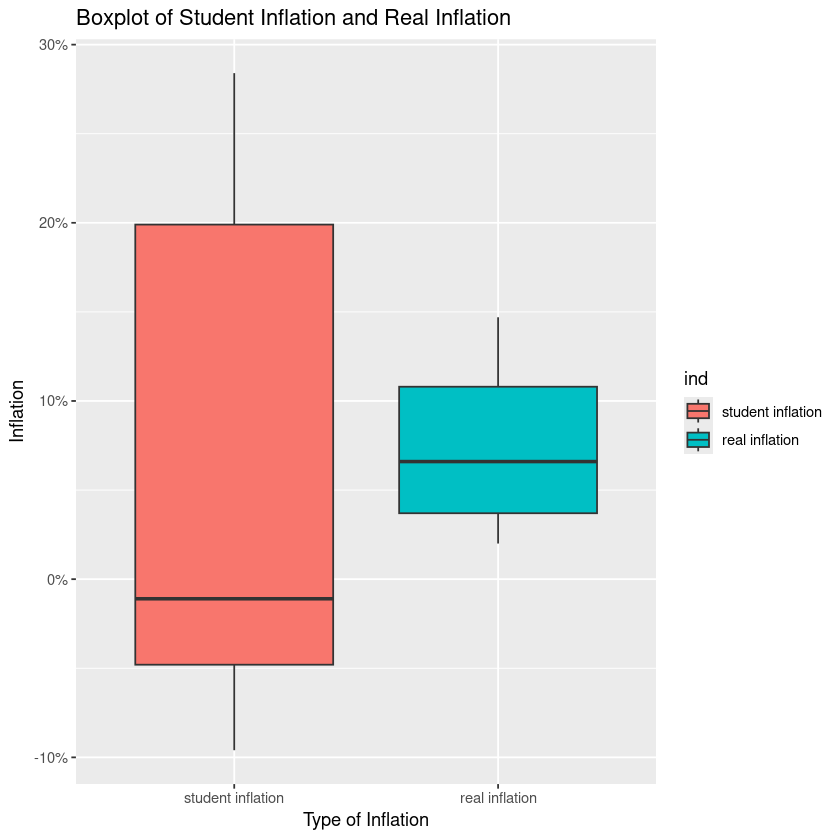

In [24]:
p <- ggplot(stack(inflation |>
                    select(student_inflation, real_inflation) |>
                    rename("student inflation" = student_inflation,
                           "real inflation" = real_inflation)),
            aes(x = ind, y = values, fill = ind)) + geom_boxplot() +
  labs(title = "Boxplot of Student Inflation and Real Inflation",
       x = "Type of Inflation",
       y = "Inflation") +
  scale_y_continuous(labels = scales::percent)
p

### Wnioski

Inflacja studencka w okresie kwiecień 2023 - kwiecień 2024 osiągała bardziej zróżnicowane wartości od inflacji realnej. Jednak średnia wartość inflacji studenckiej oraz jej mediana były niższe niż realnej inflacji

In [25]:
inflation$difference <- inflation$student_inflation - inflation$real_inflation

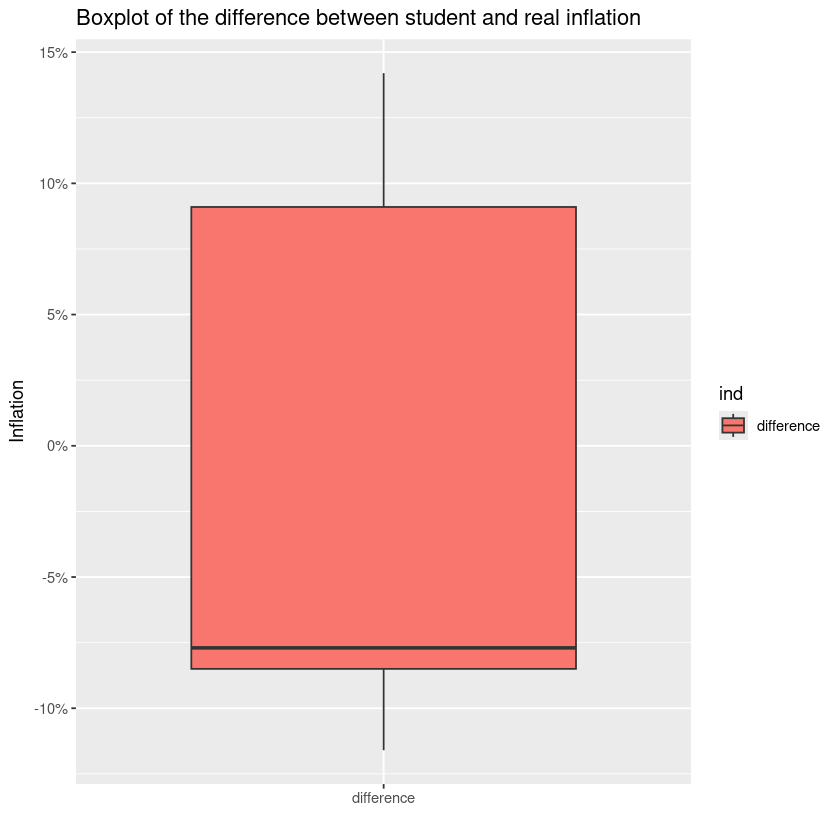

In [26]:
p <- ggplot(stack(inflation |>
                    select(difference)),
            aes(x = ind, y = values, fill = ind)) + geom_boxplot() +
  labs(title = "Boxplot of the difference between student and real inflation",
       x = "",
       y = "Inflation") +
  scale_y_continuous(labels = scales::percent)
p

In [57]:
print(paste("Mean value for the difference between real inflation and student inflation:", mean(inflation$difference))) # nolint
print(paste("Median for the difference between real inflation and student inflation:", median(inflation$difference))) # nolint

[1] "Mean value for the difference between real inflation and student inflation: -0.0184615384615385"
[1] "Median for the difference between real inflation and student inflation: -0.077"


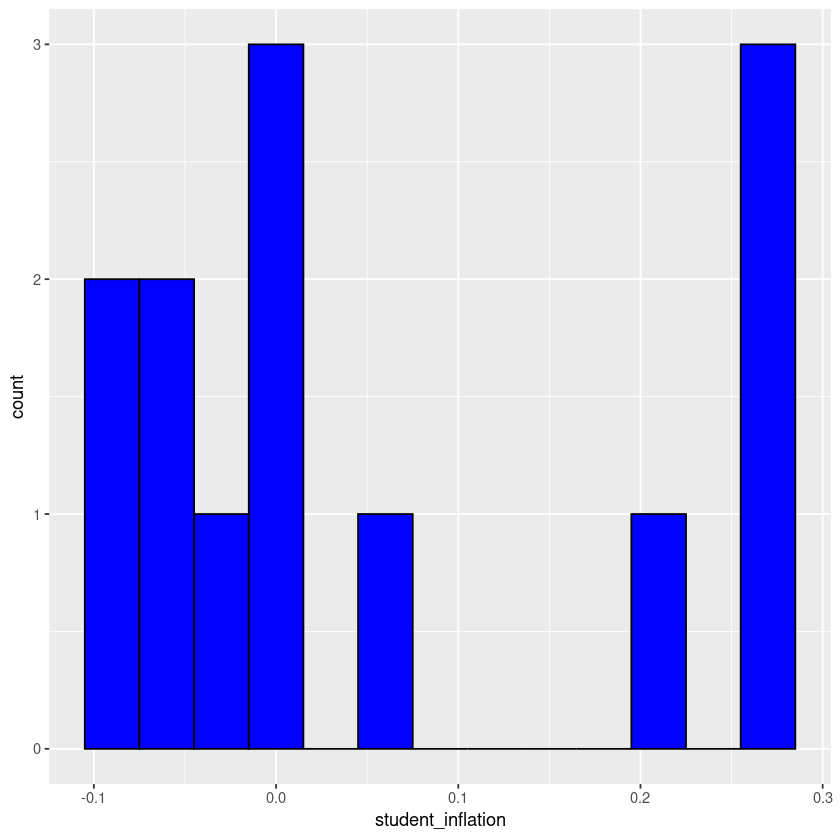

In [31]:
ggplot(inflation, aes(x = student_inflation)) +
  geom_histogram(binwidth = 0.03, color = "black", fill = "blue")

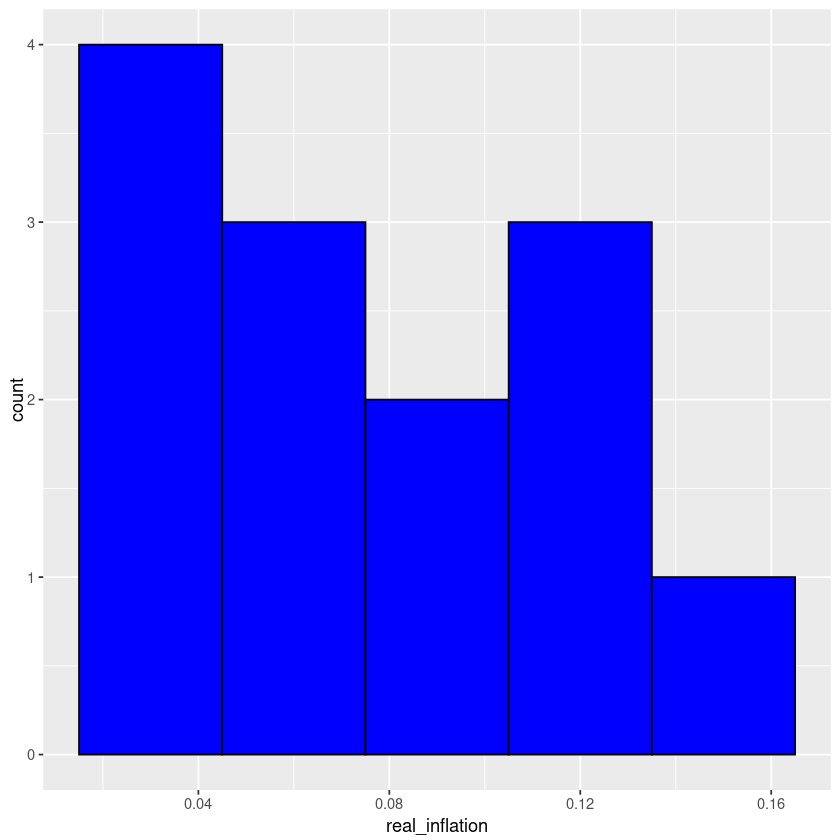

In [32]:
ggplot(inflation, aes(x = real_inflation)) + geom_histogram(binwidth = 0.03, color="black", fill="blue") # nolint

In [29]:
shapiro.test(inflation$student_inflation)


	Shapiro-Wilk normality test

data:  inflation$student_inflation
W = 0.83519, p-value = 0.01841


In [30]:
shapiro.test(inflation$real_inflation)


	Shapiro-Wilk normality test

data:  inflation$real_inflation
W = 0.94412, p-value = 0.5124


Po analizie histogramów oraz wyników testów przyjęto założenie, że wartości nie pochodzą z rozkładu normalnego, dlatego do testowania hipotez zostanie wykorzystany Test Manna-Whitneya

### Hipoteza
Inflacja realna jest większa od inflacji studenckiej (ze względu na ujemną wartość średnią różnicy pomiędzy inflacją studencką, a reczywistą)

In [40]:
test_result <- wilcox.test(inflation$real_inflation, inflation$student_inflation, alternative = "greater") # nolint

Warning message in wilcox.test.default(inflation$real_inflation, inflation$student_inflation, :
“cannot compute exact p-value with ties”


In [58]:
test_result


	Wilcoxon rank sum test with continuity correction

data:  inflation$real_inflation and inflation$student_inflation
W = 112.5, p-value = 0.07916
alternative hypothesis: true location shift is greater than 0


P-wartość testu Wilcoxona wyniosła 0.079. Oznacza to że uzyskanie takich danych przy prawdziwości hipotezy zerowej (średnia dwóch zmiennych losowych jest równa) wynosi niecałe 8%, jeśli hipotezą alternatywną jest hipoteza, że realna inflacja jest większa od inflacji studenckiej. Można zatem z duża dozą prawdoposobieństwa założyć, że początkowa hipoteza (inflacja realna jest większa od inflacji studenckiej) jest prawdziwa.

# Problem 3
### Estymacja
Wiadomo, że estymatory największej wiarygodności mają asymptotycznie rozkład normalny. Proszę
zilustrować tę cechę dowolnym przykładem (próby można tworzyć generatorem liczb losowych).

In [115]:
library(gridExtra)

In [190]:
# Ustawienie ziarna dla reprodukowalności wyników
set.seed(123)
library(ggplot2)
library(gridExtra)
create_plot_for_distribution <- function(distribution, p = NULL, size = NULL, lambda = NULL, mu = NULL, sd = NULL) { # nolint
  num_samples <- 10000
  sample_sizes <- c(10, 50, 200, 500, 1000, 2000)
  mle_results <- list()
  if (distribution == "binomial") {
    mean <- size * p
    standard_deviation <- sqrt(size * p * (1 - p))
    for (n in sample_sizes) {
      mle_estimates <- numeric(num_samples)
      for (i in 1:num_samples) {
        sample <- rbinom(n, size, p)
        mle_estimates[i] <- mean(sample)
      }
      mle_results[[as.character(n)]] <- mle_estimates
    }
  } else if (distribution == "poisson") {
    mean <- lambda
    standard_deviation <- sqrt(lambda)
    for (n in sample_sizes) {
      mle_estimates <- numeric(num_samples)
      for (i in 1:num_samples) {
        sample <- rpois(n, lambda)
        mle_estimates[i] <- mean(sample)
      }
      mle_results[[as.character(n)]] <- mle_estimates
    }
  } else {
    mean <- mu
    standard_deviation <- sd
    for (n in sample_sizes) {
      mle_estimates <- numeric(num_samples)
      for (i in 1:num_samples) {
        sample <- rnorm(n, mean = mu, sd = sd)
        mle_estimates[i] <- mean(sample)
      }
      mle_results[[as.character(n)]] <- mle_estimates
    }
  }
  plot_hist <- function(data, sample_size) {
    ggplot(data.frame(x = data), aes(x = x)) +
      geom_histogram(aes(y = ..density..), bins = 30, fill = "purple", alpha = 0.5) + # nolint
      stat_function(fun = dnorm, args = list(mean = mean, sd = standard_deviation / sqrt(sample_size)), # nolint
                    color = "red", size = 1) +
      labs(title = paste("Rozkład MLE dla n =", sample_size),
           x = expression(hat(mu)), y = "Gęstość") +
      theme_minimal()
  }
  plots <- lapply(sample_sizes, function(n) plot_hist(mle_results[[as.character(n)]], n)) # nolint
  do.call("grid.arrange", c(plots, ncol = 2))
}

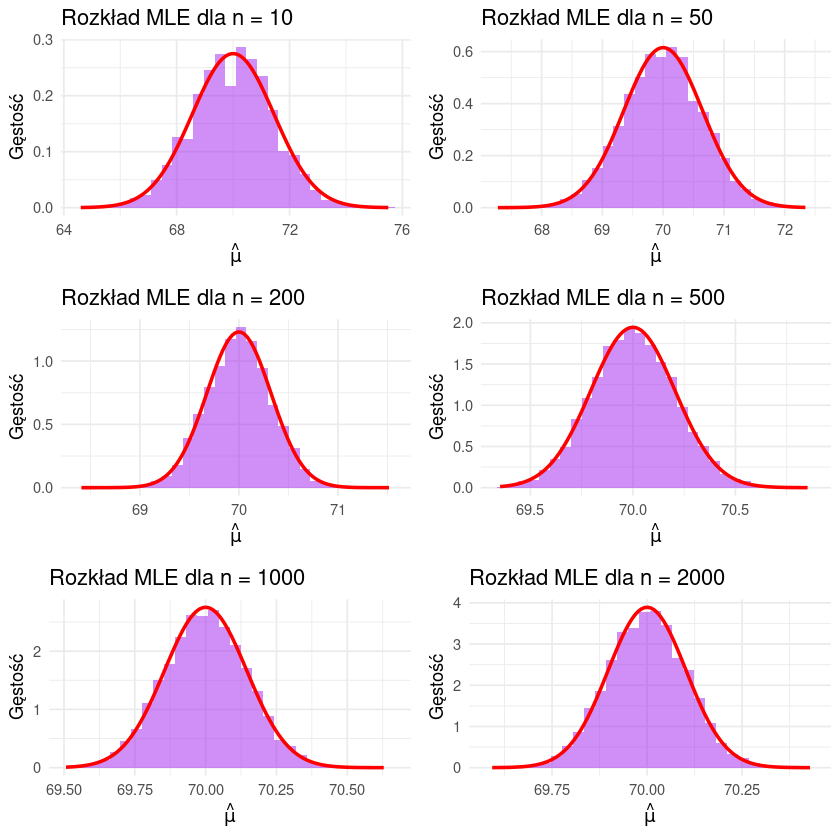

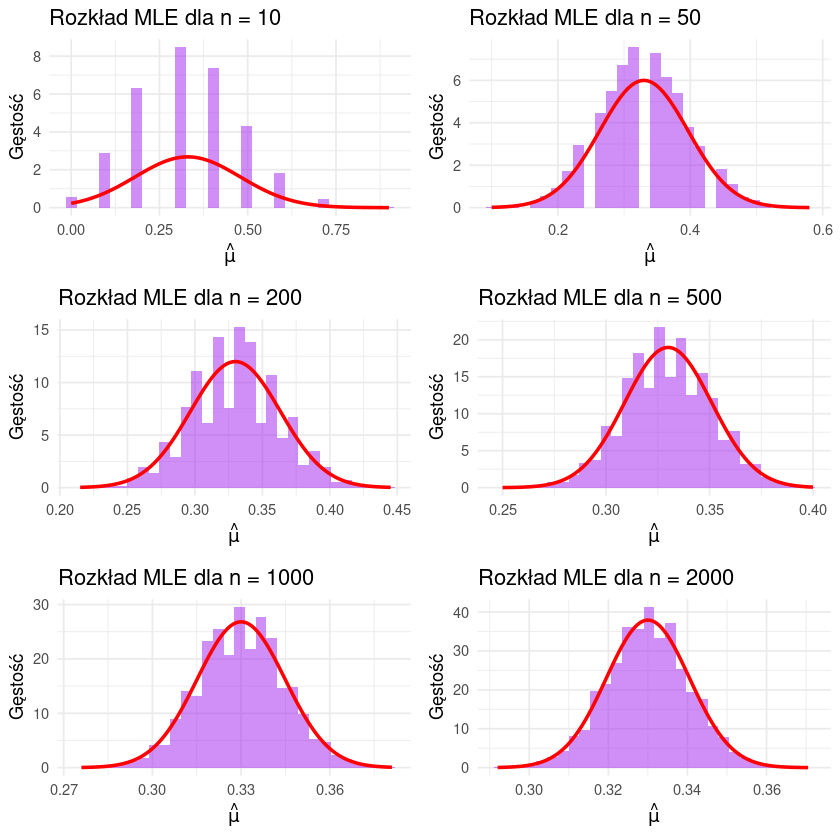

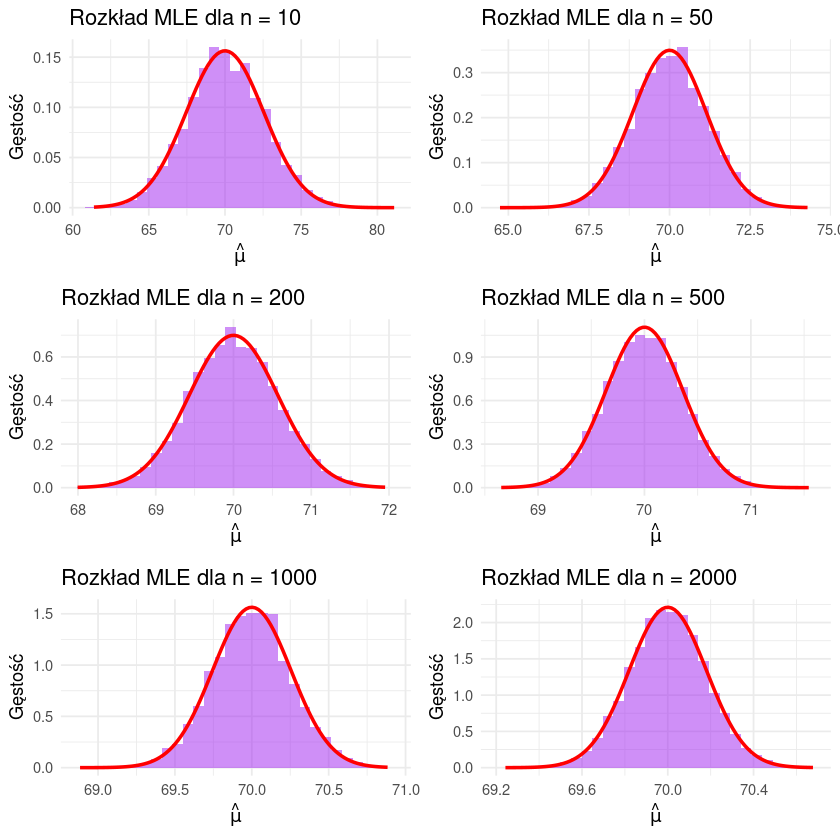

In [191]:
create_plot_for_distribution("binomial", size = 100, p = 0.7)
create_plot_for_distribution("binomial", size = 1, p = 0.33)
create_plot_for_distribution("binomial", size = 1000, p = 0.07)

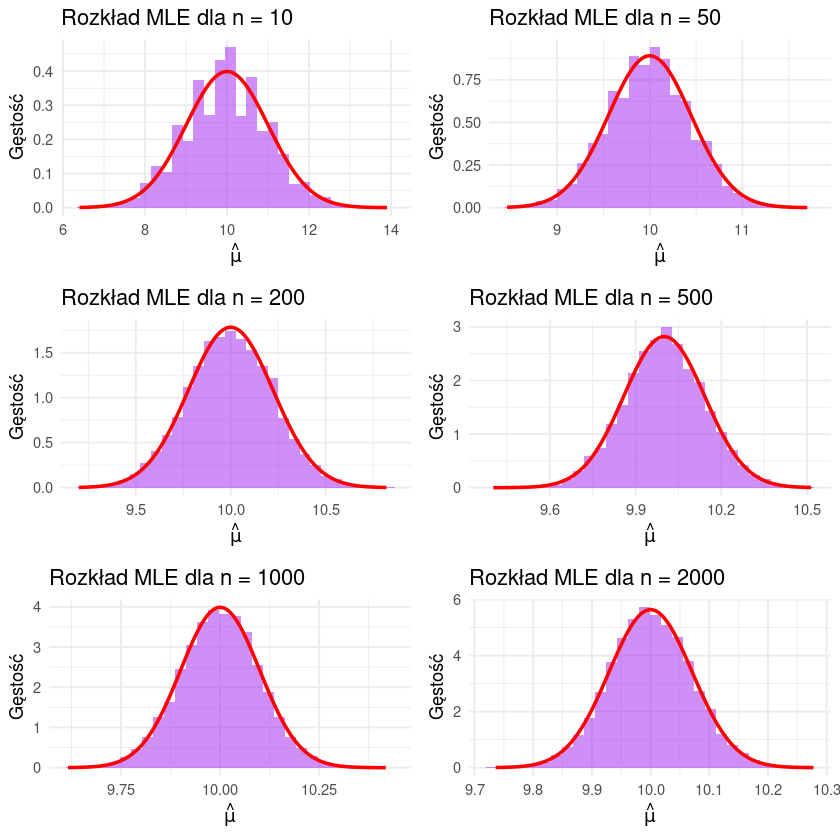

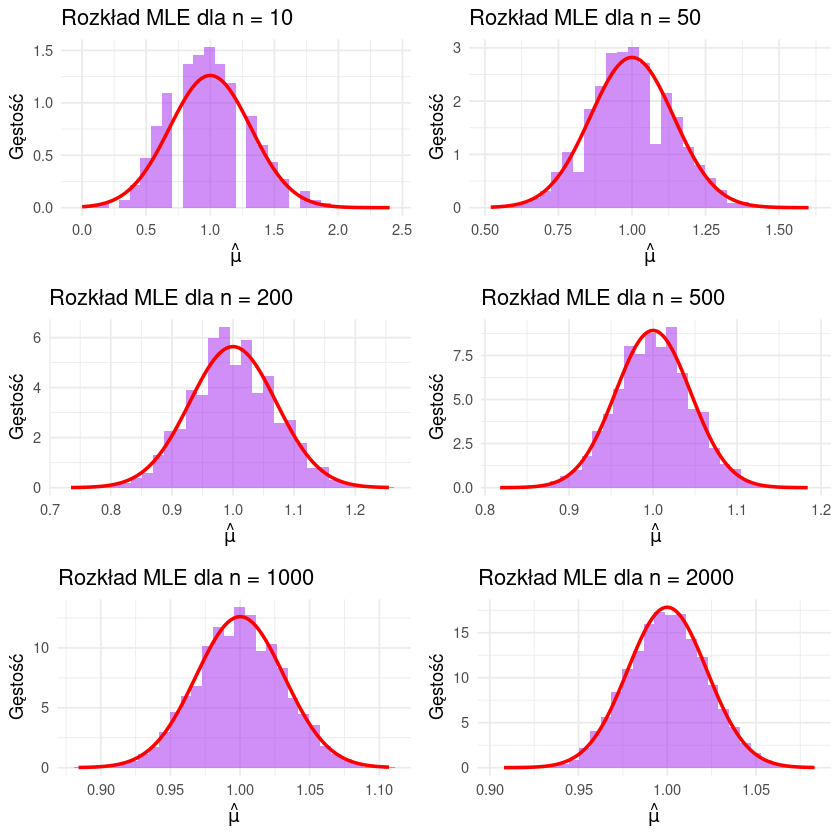

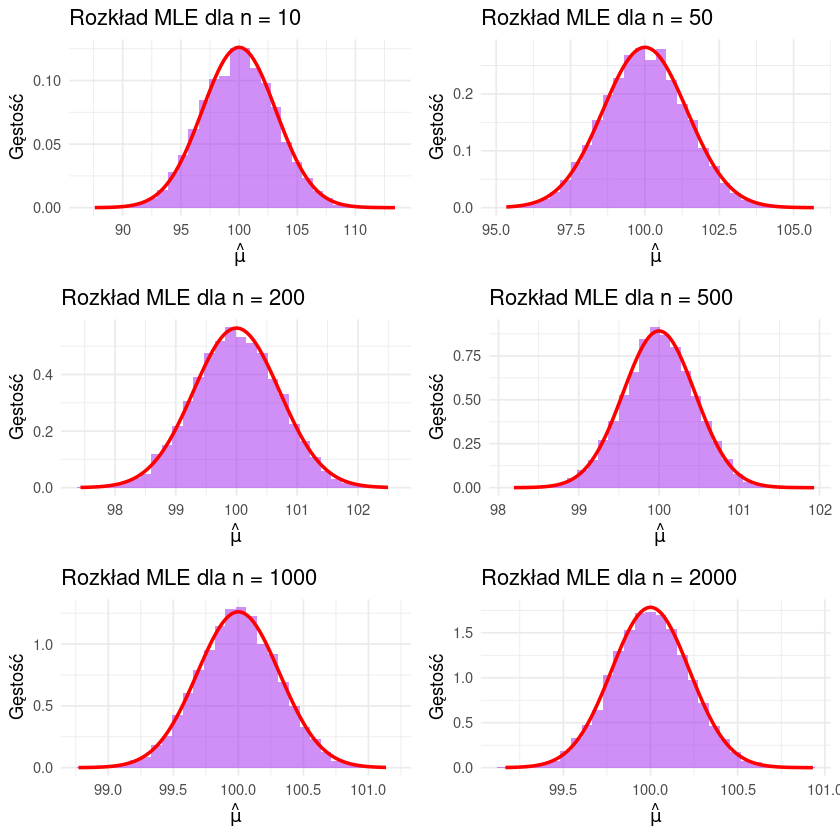

In [192]:
create_plot_for_distribution("poisson", lambda = 10)
create_plot_for_distribution("poisson", lambda = 1)
create_plot_for_distribution("poisson", lambda = 100)

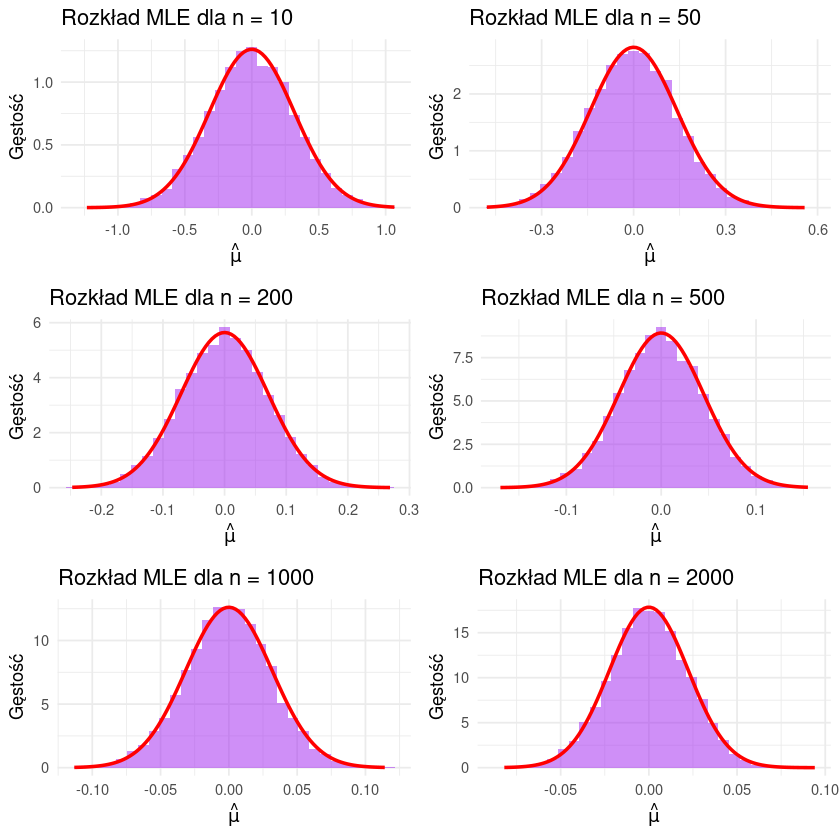

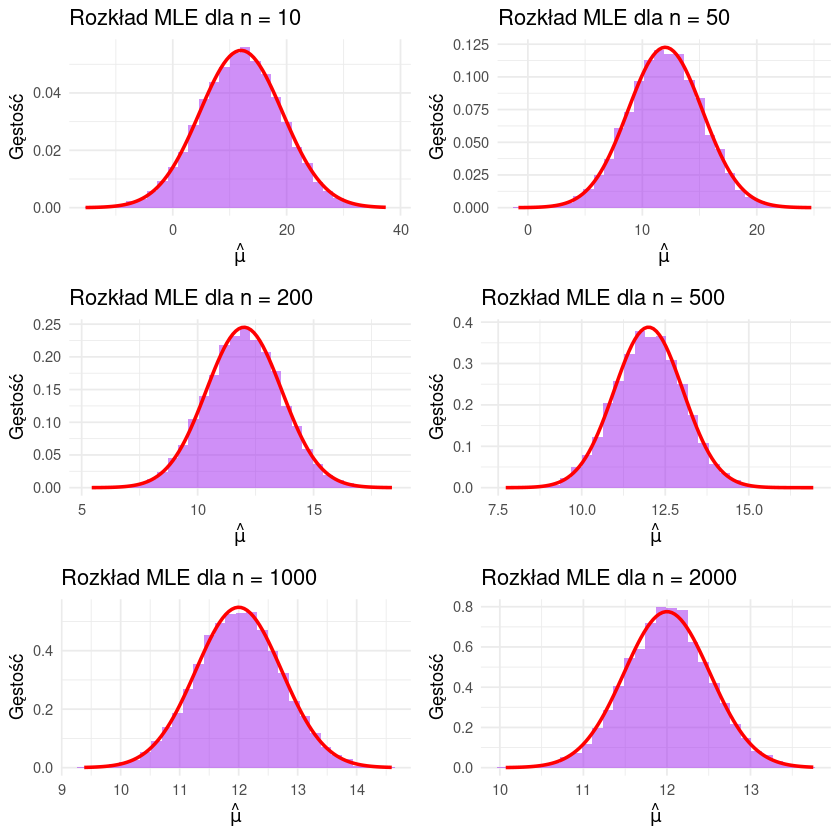

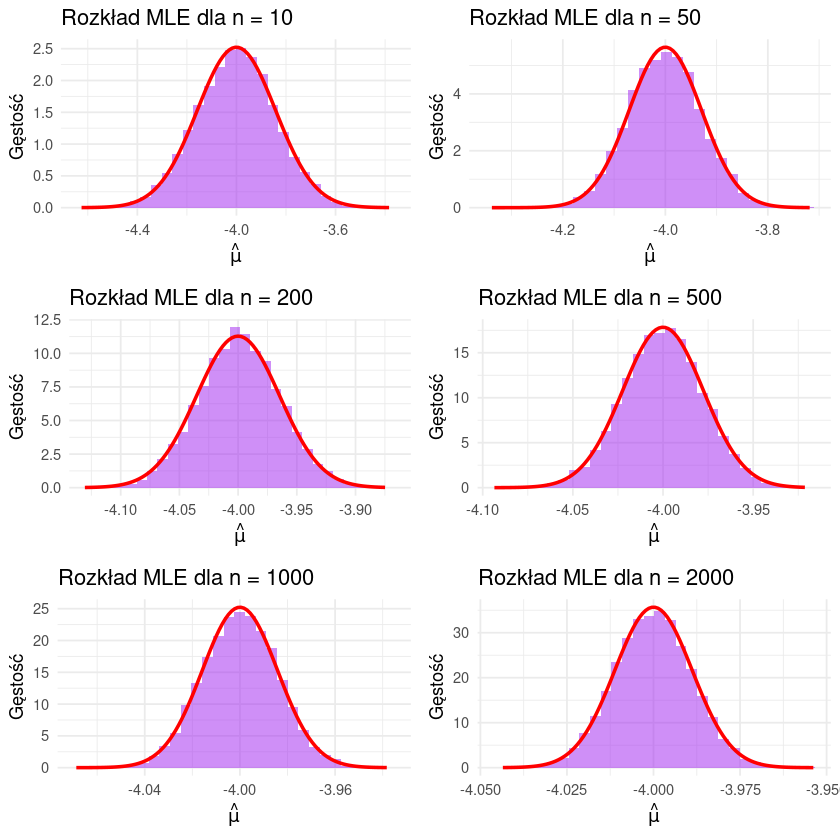

In [193]:
create_plot_for_distribution("normal", mu = 0, sd = 1)
create_plot_for_distribution("normal", mu = 12, sd = 23)
create_plot_for_distribution("normal", mu = -4, sd = 0.5)

### Opis
Przetestowano 3 różne rozkłady (Dwumianowy, Poissona oraz Normalny) dla 3 różnych zestawów parametrów. Czerwona linia obrazuje rzeczywistą gęstość rozkładu normalnego z zadanymi parametrami. Histogram przedstawia liczność z jaką dane wartości zostały otrzymane w symulacji. Można zaobserwować, że we wszystkich badanych rozkładach, wraz ze wzrostem liczby próbek, histogram coraz bardziej "dopasowuje się" do linii rozkładu gęstości, co oznacza, że cel został osiągnięty- pokazano, że estymatory największej wiarygodności mają asymptotycznie rozkład normalny, bez względu na typ rozkładu, z którego wyliczany jest estymator.